# MODEL PROJECT

## 1. Introduction

For our model project we have decided to focus on the Kass-Koopmans model of exogenous growth. Before moving to the overall equilibrium, we focus on the consumner optimization problem. We subsequently introduce the firm player and the main features of the model

## 2. Import packages

In [11]:
import numpy as np
import scipy as sp
import math
from scipy import optimize
import sympy as sm
from scipy import linalg
from sympy import Derivative
from scipy import interpolate
import scipy.integrate as quad
from scipy.integrate import odeint
import scipy.special as special
from scipy.integrate import quad
from sympy import symbol,function
import ipywidgets as widgets
from IPython.display import display

#autoreload model when code is run
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3. Consumer optimization problem

Before moving to the Ramsey model, we focus on consumers and their optimization problem. The standard Ramsey model assumes that the individual presents a CRRA utility function with respect to consumption of the type:  

$$u(c)=\frac{c^{1-\theta}-1}{1-\theta}$$  

where $\theta$ is a measure or relative risk aversion.
This type of preferences is really useful in the case $\theta=1$. In this occasion the CRRA utility becomes a logarithmic utility function.  
We now create a simple utility maximization problem with two periods to detect how these preferences impact the consumer optimal behavior. We take into consideration two periods, $t=0$ and $t=1$.   
Our representative consumer maximizes consumption in the present $c_0$ and in the future $c_1$ taking into consideration his labour income will be $w_0$ today and $w_1$ tomorrow. So, our utility maximization problem become:  

$$max \hspace{2pt} U(c_0,c_1) = u(c_0)+e^{-\rho}u(c_1)$$  

under the constraint:  

$$c_0+\frac{1}{1+r}{c_1} = w_0 +\frac{1}{1+r}{w_1}$$  

where $\rho$ is the subjective discount rate and r the interest rate.

Now, before solving the problem, we give some initial values:

In [12]:
#a. Defining initial parameters
theta = 0.5
w_t= 10      #present labour income
w_t1 = 10     #future labour income
rho = 0.9
r = 0.5

#a. Defining utility function
def utility(ct):
    return (ct**(1-theta)-1)/(1-theta)

#b. Defining utility function for two periods
def inter_util(c_t, c_t1):
    return utility(c_t)+np.exp(-rho)*utility(c_t1)

#c. Defining constraint
def constraint(c_t,c_t1):
    return w_t+(1/(1+r))*w_t1-c_t-(1/(1+r))*c_t1


To solve the maximization problem we firstly set the lagrangian:  

$$L=\max_{c_{0},c_{2}}\bigg(\frac{c_{0}^{1 - \theta} - 1}{1 - \theta}\bigg) + e^{-\rho}\bigg(\frac{c_{1}^{1 - \theta} - 1}{1 - \theta}\bigg) + \lambda\bigg(w_{0} + \frac{1}{1 + r}w_{1} - c_{0} - \frac{1}{1 + r}c_{1}\bigg)$$  

and we compute the first order conditions:
$$c_{0}^{-\theta} = \lambda$$
$$e^{-\rho}c_{1}^{-\theta}=\frac{1}{1 + r}\lambda$$  

The above reduces to:
$$c_{0}^{-\theta} = e^{-\rho}(1 + r)c_{1}^{-\theta}$$  

We transpose the above into code:

In [13]:
#d. Defining Euler equation
def euler(c_t,c_t1):
    return c_t**(-theta)-np.exp(-rho)*(1+r)*(c_t1)**(-theta)

#e. Creating optimization function
def optimalchoice(x):
    op = [euler(x[0], x[1])]
    op.append(constraint(x[0],x[1]))
    return op
 
#f. Applying fsolve function
ct_guess, ct1_guess = 0.5, 0.5
ct_star, ct1_star = optimize.fsolve(optimalchoice, x0=(ct_guess, ct1_guess))
utility_star = inter_util(ct_star, ct1_star)
 
#g. Printing results
print(f'The optimal consumption at the present is: {ct_star:.2f}')
print(f'The optimal consumption tomorrow is: {ct1_star:.2f}')
print(f'Utility from optimal bundle is: {utility_star:.2f}')

The optimal consumption at the present is: 13.36
The optimal consumption tomorrow is: 4.97
Utility from optimal bundle is: 6.31


We now construct an interactive plot to study the optimal behaviour of our consumer when the underlying parameters change.

In [14]:

def plot_max_problem(w_t, w_t1, theta, rho):

    fig1 = plt.figure(dpi=150)
    ax = fig1.add_subplot(1,1,1)

    #grid of (x,y) values which we will pass to function
    ct_range = np.linspace(0, 10, 1)
    ct1_range = np.linspace(0, 10, 1)
    c_t, c_t1 = np.meshgrid(ct_range, ct1_range)
    
    # we will actually plot utility
    uti = inter_util(c_t, c_t1)

    # plot the budget constraint
    cons_today = np.linspace(0, 10, 100)
    ax.plot(cons_today, (1 + r) * (w_t - cons_today) + w_t1, 
           color='r')

    # demarcate the indifference curve
    CS = ax.contour(ct_star, ct1_star, utility_star, np.array([utility_star]), colors='k', linewidths=1, linestyles='solid')
    ax.clabel(CS, inline=1, fmt='%1.4f')

    # mark the optimal bundle
    ax.hlines(ct_star, 0, ct1_star, linestyle='dashed')
    ax.vlines(ct1_star, 0, ct_star, linestyle='dashed')

    # axes, labels, title, colorbar 
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel(r'Present Consumption, $C_{t}$', fontsize=10)
    ax.set_ylabel(r'Future Consumption, $C_{t+1}$', fontsize=10)
    ax.set_title(r'Optimal bundle for CRRA utility', fontsize=15)
    plt.show()

def plot_time():
    widgets.interact(plot_max_problem,
    w_t= widgets.FloatSlider(
           description='$w_{t}$',
           min=0,
           max=10,
           step=1,
           value=5,
           continuous_update=False,
    ),
    
    w_t1 = widgets.FloatSlider(
            description="$w_{t+1}$",
            min=0,
            max=10,
            step=1,
            value=5,
            continuous_update=False,
    ),
    theta = widgets.FloatSlider(
            description="$\\theta$",
            min=0.5,
            max=0.9,
            step=0.02,
            value=0.5,
            continuous_update=False,
    ),
    rho = widgets.FloatSlider(
            description="$\\rho$",
            min=0.9,
            max=0.99,
            step=0.01,
            value=0.9,
            continuous_update=False,
    ),
);  
    

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='$w_{t}$', max=10.0, step=1.…

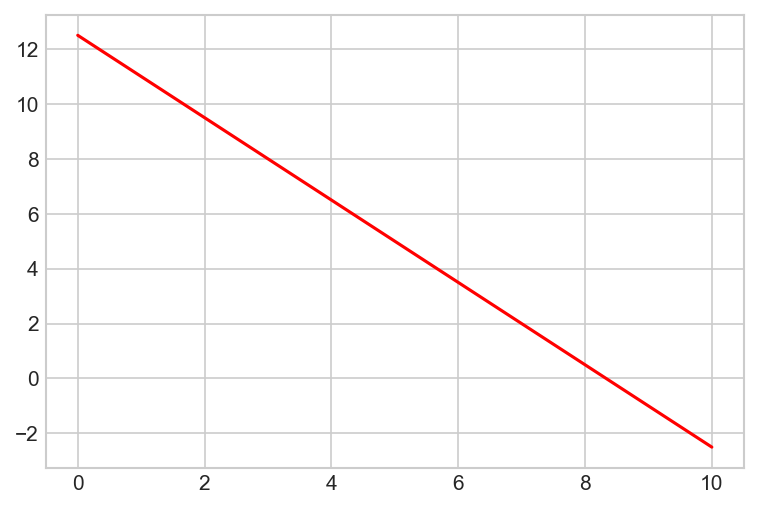

In [15]:
plot_time()


## 4. Firm optimization problem 

In the Ramsey model the represenatative firm has a production function that satisfies the neoclassical properties of constant return to scale in $K$ (capital) and $L$ (Labour) and each input exhibits positive but diminishing marginal product. We will deal with quantities per unit of effective labor. So the production function will be written in intensive form:
$\hat{y}=f(\hat{k})$ where $\hat{y}=\frac{Y}{LT}$, $\hat{k}=\frac{K}{LT}$ and T is the technology.

Specifically, we are going to assume the following production function:  

$$\hat{y}=f(\hat{k})=k^{\alpha}$$  

where $\alpha$ is the capital share of output and $k$ is capital per effective labour. 
From now on, for simplicity, we assume that technology will increase at the rate $x=0$.
We now check that in this case the marginal product of capital are diminishing ($f''< 0$) and that the Inada conditions are satisfied.

In [52]:
#a. Transposing into symbols
sm.init_printing(use_unicode=True) # for pretty printing        
alpha = sm.symbols('alpha')        # capital share
k = sm.symbols('k')                 # capital per effective worker               
W = sm.symbols('W')                # wage
l = sm.symbols('l')
T = sm.symbols('T')
delta = sm.symbols('delta')
r = sm.symbols('r')
w = sm.symbols('w')

The production function is:


The profit function is:


The first derivative with respect to k is:


The second derivative with respect to k is:


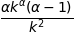

First Inada condition is:


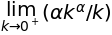

Second Inada condition is:


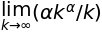

In [53]:
#b. Defining production function
prod = k**alpha
print(f'The production function is:')
display(prod)

#c. Defining profit function
profit = prod - (r+delta)*k -w*L
print(f'The profit function is:')
display(profit)

#d. Calculating first and second derivatives with respect to k
print(f'The first derivative with respect to k is:')
sol = sm.diff(prod,k)
display(sol)
print(f'The second derivative with respect to k is:')
sol1 = sm.diff(prod,k, k)
display(sol1)

#e. Check Inada conditions
print(f'First Inada condition is:')
inada1 = sm.Limit(sol,k,0)
display(inada1)
print(f'Second Inada condition is:')
inada2 = sm.Limit(sol,K, sm.oo)
display(inada2)


In [50]:
#f. Profit maximization with respect to capital per effective worker
print(f'Optimazing the profit with respect to k, we obtain:')
profitk = sm.Eq(sm.diff(profit,k))
display(profitk)
print(f'And the optimal k is:')
profitk1 = sm.solve(profitk,k)
display(profitk1)

Optimazing the profit with respect to k, we obtain:


And the optimal k is:


In [54]:
#d. Profit maximization with respect to labour per effective worker
print(f'Optimazing the profit with respect to w, we obtain:')
profitl = sm.Eq(sm.diff(profit,l))
display(profitl)
print(f'And the optimal l is:')
profitl1 = sm.solve(profitl,l)
display(profitl1)

Optimazing the profit with respect to w, we obtain:


And the optimal k is:


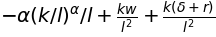

In [63]:
a = (K/(L))**alpha-(K/(L))*(r+delta)-w*(K/(L))
display(a)
a1 = sm.diff(a,l)
display(a1)
b = sm.solve(a1,l)
display(b)
sm.simplify(b)

## 5. Model Equilibrium & Dinamics

We make now our representative consumer and firm interacting with each other and we briefly describe the main features of the Ramsey model. Our optimizer household of *section.2* exhibits the same CRRA utility function with respect to consumption. The new element is that he maximizes over an infinite horizon taking into account the welfare and resources of his prospective descendants. The current household expects the size of its future family to grow at the rate $n$, given as exogenous and constant. We normalize the size of the family at time $t= \small{0}$ to 1, so that at the generic time $t$, the size of the family will be $L(t)=e^{nt}$. So, the utility maximization problem become:
 
$$U= \int_{0}^{\infty} e^{-(\rho-n)t}\left[\frac{c^{1-\theta}-1}{1-\theta}\right]dt$$

The household hold assets ($a(t)$) which pay rate of return $r(t)$ and supplies inelastically one unit of labor services for the wage rate $w(t)$. We assume a closed economy so that no assets can be traded internationally and we assume a competitive market so that the interest rate, r $r(t)$, and the wage rate $w(t)$ are given.                              
The total income received by the aggregate is the sum of labor income, $w(t)·L(t)$, and asset income, $r (t)·(Assets)$ and the income that it is not consumed, it is used to accumulate more assets:  

$$\frac{d(Assets)}{dt} = r(Assets)+wL-C$$  

In per-capita terms it becomes:  

$$\dot{\alpha} = (r-n)\alpha+w-c$$

We assume that the credit market imposes a constraint on the amount of borrowing to rule out chain-letter possibilities. The appropriate restriction turns out to be that the present value
of assets must be asymptotically nonnegative:  
$$\lim_{t \to \infty} \bigg\{ \alpha(t)exp\left[-\int_{0}^{t}[r(v)-n]dv \right] \bigg\} = 0$$

In [ ]:
# Solving differential equation for multiple values
A =2 
def model(c, t, sigma, delta, rho):
    dcdt = sigma**(A-delta-rho)
    return dcdt

#initial condition
c0 = 3

#time point
t=np.linspace(0,10,10) #start,f

# Solve ODEs
sigma= 0.1
delta= 0.3
rho= 0.9
c1 = odeint(model,c0,t, args=(sigma, delta, rho,))
sigma=0.2
delta=0.3
rho=0.9
c2 = odeint(model,c0,t, args=(sigma, delta, rho,))
sigma= 0.3
delta= 0.3
rho= 0.9
c3 = odeint(model,c0,t, args=(sigma, delta, rho,))

#plot results
plt.plot(t,c1,'r-', linewidth=2)
plt.plot(t,c2,'b--', linewidth=2)
plt.plot(t,c3,'g:', linewidth=2)
plt.xlabel('time')
plt.ylabel('c(t)')

In [ ]:
# parameter values 
theta = 3.0
rho = 0.01
n = 0.0025
delta = 0.3
alpha = 0.3
g=0

#Sanity check for parameter values
(rho - n) > (1 - theta)*g

In [ ]:
#define production function
def prod(k_t):
    return k_t**alpha

def cons_t1(c_t, k_t):
    return (np.exp(-rho) * (np.exp(-delta) + alpha * cap_t1(c_t, k_t)**(alpha - 1)))**(1 / theta) * c_t

#define capital equation
def cap_t1(c_t,k_t):
    return np.exp(-n)*(prod(k_t)+np.exp(-delta)*k_t-c_t)

#difference between two periods capital
def capt_cap1(c_t, k_t):
    return cap_t1(c_t, k_t) - k_t

#difference between two period consumption
def const_const1(c_t, k_t):
    return cons_t1(c_t, k_t) - c_t

In [ ]:
def k_star():
    return ((alpha * np.exp(-rho)) / (1 - np.exp(-(rho + delta))))**(1 / (1 - alpha))

def c_star():
    return prod(k_star())+(np.exp(-delta)-np.exp(n))*k_star()

k_star()

In [ ]:
#k a crescita 0
def locus_cap(k_t):
    return prod(k_t) - k_t*(-np.exp(-delta) + np.exp(n))

#define saddle path
def saddle_path(k):
    return (A-delta-n-epsilon)*k

In [ ]:
# Create a grid of points for plotting
x_vec = np.linspace(0, 500, 7000)
# Create a new figure
plt.figure(figsize=(10,7))
plt.xlim(0,7)
plt.ylim(0,2)
plt.grid(False)
plt.xlabel([])

# Add the capital and consumption locii
plt.plot(x_vec, locus_cap(x_vec), linestyle ='--', color='black') 
plt.axvline(k_star(), linestyle = '-', color = 'black')
plt.plot(k_star(), c_star(), marker='o', markersize = 10, color ='red')

# Arrows to indicate  dynamics 

plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0, dy=0.2, head_width = 0.1, head_length= 0.1, color = 'orange')
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0.2, dy=0, head_width = 0.1, head_length= 0.1, color = 'orange')
plt.arrow((1/2)*k_star(), 2*c_star(), dx=0, dy=0.2, head_width = 0.1, head_length= 0.1, color = 'orange')
plt.arrow((1/2)*k_star(), 2*c_star(), dx=-0.2, dy=0, head_width = 0.1, head_length= 0.1, color = 'orange')

plt.arrow(2*k_star(), (1/2)*c_star(), dx=0, dy=-0.2, head_width = 0.1, head_length = 0.1, color = 'orange')
plt.arrow(2*k_star(), (1/2)*c_star(), dx=0.2, dy=0, head_width = 0.1, head_length = 0.1, color = 'orange')
plt.arrow(2*k_star(), 2*c_star(), dx=0, dy=-0.2, head_width = 0.1, head_length = 0.1, color = 'orange')
plt.arrow(2*k_star(), 2*c_star(), dx=-0.2, dy=0, head_width = 0.1, head_length = 0.1, color = 'orange')
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)

# Add title and axis labels
plt.xlabel('Capital (k)', fontsize = 12)
plt.ylabel('Consumption (c)', fontsize = 12)
plt.title('Ramsey Model Phase Diagram ', fontsize=15, weight='bold', pad = 10)
plt.show()


In [ ]:
# Simulating deterministic Ak model 

St_dict = {'k_star': k_star(), 'c_star': c_star()}
        
# Update variables
def update():
    c_t = cons_t1(c_t1, k_t1)
    k_t = cap_t1(c_t1, k_t1)

# Create paths of length n starting from current state variables
def s_path( n=None):
    
    tra = np.zeros(shape=(n,2))
            
    for t in range (n):
        tra[t,0]=k_t
        tra[t,1]=c_t
        update()
            
        return tra

# Find steady state thorugh optimization
def steadystate(k0=None, c0=None):
            
    def SS(X):
        res=[cap_t1(X[0],X[1]-X[0])]
        res.append(cons_t1(X[0],X[1]-X[1]))
        return res
        
    return optimize.fsolve(SS, x0=(c0,k0))


# Compute saddle_path
def optimal_path(k0=None, c0=None, tol=1.5e-08):
       
        # compute steady state values
        c_star, k_star = St_dict['c_star'], St_dict['k_star']
        
        if k0 <= k_star:
            c_l = 0
            c_h = c_star
        else:
            c_l = c_star
            c_h = k0**alpha
        c0 = (c_h + c_l) / 2
        c_t, k_t = c0, k0
    
        #Initialize algorith 
        cal  = 0
        n_iter = 0
        
        # Algorithm
        while 1:
            update()
            dist = np.abs(((c_t - c_star)**2 + (k_t - k_star)**2)**(1/2))
            cal = cal + 1
            if k0 <= k_star:
                if k_t > k_star:
                    if dist < tol:
                        break
                    else: 
                        c_low = c0
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
                if c_t > c_star:
                    if dist < tol:
                        break
                    else: 
                        c_high = c0 
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
            else:
                if k_t < k_star:
                    if dist < tol:
                        break
                    else: 
                        c_high = c0 
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
                if c_t < c_star:
                    if dist < tol:
                        break
                    else: 
                        c_low = c0
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
                
        c_t, k_t = c0, k0
        result = s_path(cal)

        return [c_t, result, s_path, dist]
        
# Saddle path
solution = optimal_path(k0, tol=1.4e-7)

In [ ]:
# Set initial levels for c,k
c_t1, k_t1 = 0.4, 12

# Generate a sample path of length 10 for the Ramsey economy 
s_path(10)

cap_t1(0.4, 12), cons_t1(0.4, 12)


In [ ]:
# Grid of points for plotting
x1_vec = np.linspace(0, 500, 7000)

#initial level of capital
k0 = 0.5 * St_dict['k_star']

# Create an array of initial conditions for choices of consumption per effective worker
initial_consumption = np.linspace(0.5 * St_dict['c_star'], 1.5 * St_dict['c_star'], num=5)

# Create a new plot
plt.figure(figsize=(10,7))
plt.xlim(0,7)
plt.ylim(0,2)

# Add the consumption and capital 
plt.plot(x1_vec, locus_cap(x1_vec), linestyle ='--', color='black', label=r'$c=(A-\delta-n)k$')
plt.axvline(St_dict['k_star'], color='black')
plt.plot(St_dict['k_star'], St_dict['c_star'], marker='o', markersize=7, color='red')
# saddle-path
plt.plot(solution[1][:, 0], solution[1][:, 1], color='red')

# initial level of capital per worker
plt.axvline(k0, color='green', ls='--')

# FOR loop plots a sample path for each initial value of c
for c_t in initial_consumption:
    c_t, k_t = c_t, k0
    trpath = s_path(1000) 
    plt.plot(trpath[:, 0], trpath[:, 1])

# Add title and axis labels
plt.xlabel('Capital (k)', fontsize = 12)
plt.ylabel('Consumption (c)', fontsize = 12)
plt.title('Ramsey Model Phase Diagram ', fontsize=15, weight='bold', pad = 10)
plt.show()